In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')


In [3]:
thietbi.rename(columns = {'Retail Branding':'Branding','Marketing Name':'MarketingName'}, inplace=True)

In [4]:
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')

dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [12]:
#Câu 4
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')

dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [13]:
#Câu 5
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [11]:
#Câu 5b // không đc chạy
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model', how='left')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F,Samsung,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F,Samsung,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303,Sony,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F,Samsung,SM-G361F,Samsung,SM-G361F


In [14]:
#Câu 6
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


In [15]:
#Câu 7
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


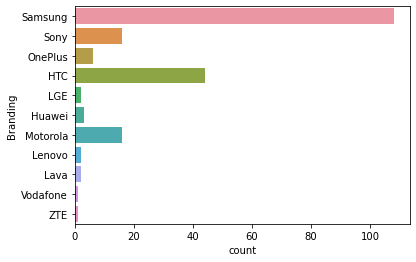

In [73]:
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

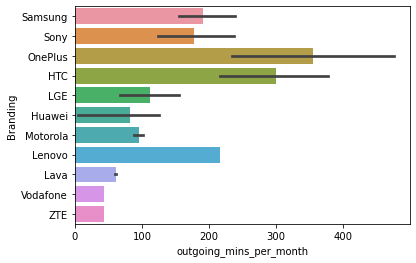

In [78]:
sns.barplot(y="Branding", x="outgoing_mins_per_month", data=dfKetQua)
plt.show()

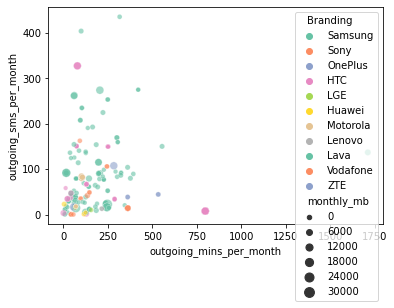

In [87]:
#cau 10
sns.scatterplot(
    data=dfKetQua, 
    x='outgoing_mins_per_month', 
    y='outgoing_sms_per_month', 
    hue='Branding',        # Phân biệt các thương hiệu khác nhau bằng màu sắc
    size='monthly_mb',     # Độ lớn của điểm tương ứng với dữ liệu 'monthly_mb'
    sizes=(20, 100),       # Kích thước điểm từ nhỏ đến lớn
    palette='Set2',        # Bảng màu cho các thương hiệu
    alpha=0.6              # Độ trong suốt của các điểm
)

# Hiển thị biểu đồ
plt.show()